# Amplifier Noise Plot for Tofu
Based on Analog Devices **AN-940 Application Note: Low Noise Amplifier Selection Guide for Optimal Noise Performance**

An amplifier can be selected where its noise contribution is negligible compared to the source resistance by using a figure  of merit, Rs, of an op amp. It can be calculated by using an amplifier’s noise specification.

    Rs = input-referred_voltage_noise / input-referred_current_noise

Usually the specifications are at 1 kHz.

To graph this specification first locate the given source resistance (in this it is 100 Ohms) on the Johnson noise line.  Then create a horizontal line from this point located to the right of the plot.  Next create a line down and to the left from the point located at the beginning by decreasing one decade of voltage noise per one decade of resistance. Any amplifiers below and to the right of the lines are good low noise op amps for the designed source resistance.  

In [317]:
import numpy as np
import matplotlib.pyplot as plt

In [318]:
source_resistance_scale = np.linspace(10, 1e6) # 10 - 1M Ohms
voltage_noise_scale = np.linspace(0.1, 100) # nV/sqrt(Hz)

In [319]:
# Resistor Johnson thermal noise
k = 1.38e-23 # J/K, Boltzmann's constant
T = 293.15 # K, 20 C in K
R = np.linspace(10, 1e6) # 10 - 1M Ohms
B = 1 # Hz, (1kHz Bandwidth?)
V_n = np.array([])
for i, element in enumerate(R):
    res_noise = np.sqrt(4 * k * T * B * element)
    V_n = np.append(V_n, res_noise)

# For 100 Ohm source reference
source_res = 100
ref_res_noise = np.sqrt(4 * k * T * B * source_res) # V/sqrt(Hz), 100 Ohms

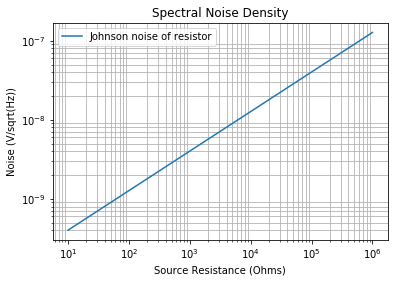

In [320]:
plt.plot(R, V_n, label="Johnson noise of resistor") # or can use loglog
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Source Resistance (Ohms)")
plt.ylabel("Noise (V/sqrt(Hz))")
plt.title("Spectral Noise Density")
plt.grid(True, which="minor")
plt.legend()
plt.show()

In [321]:
# Various amplifiers in Tofu
LTC6363_volt_noise = 7.0e-9 # V/sqrt(Hz)
LTC6363_current_noise = 1.5e-12 # A/sqrt(Hz)
LTC6363_Rs = LTC6363_volt_noise / LTC6363_current_noise # Ohms

LT6203_volt_noise = 3e-9 # V/sqrt(Hz)
LT6203_current_noise = 1.25e-12 # A/sqrt(Hz)
LTC6203_Rs = LT6203_volt_noise / LT6203_current_noise # Ohms

AD8058_volt_noise = 8e-9 # V/sqrt(Hz)
AD8058_current_noise = 1.75e-12 # A/sqrt(Hz)
AD8058_Rs = AD8058_volt_noise / AD8058_current_noise # Ohms

ADA4898_volt_noise = 0.85e-9 # V/sqrt(Hz)
ADA4898_current_noise = 2.5e-12 # A/sqrt(Hz)
ADA4898_Rs = ADA4898_volt_noise / ADA4898_current_noise # Ohms

AD8421_volt_noise = 8.0e-9 # V/sqrt(Hz)
AD8421_current_noise = 200e-15 # A/sqrt(Hz)
AD8421_Rs = AD8421_volt_noise / AD8421_current_noise # Ohms

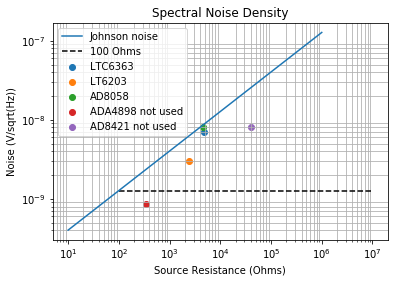

In [322]:
plt.loglog(R, V_n, label="Johnson noise")
plt.hlines(ref_res_noise, xmin=100, xmax=10e6, linestyles="dashed", label="100 Ohms") # 100 Ohm source reference
plt.scatter(LTC6363_Rs, LTC6363_volt_noise,  label="LTC6363")
plt.scatter(LTC6203_Rs, LT6203_volt_noise,  label="LT6203")
plt.scatter(AD8058_Rs, AD8058_volt_noise,  label="AD8058")
plt.scatter(ADA4898_Rs, ADA4898_volt_noise,  label="ADA4898 not used")
plt.scatter(AD8421_Rs, AD8421_volt_noise,  label="AD8421 not used")
plt.xlabel("Source Resistance (Ohms)")
plt.ylabel("Noise (V/sqrt(Hz))")
plt.title("Spectral Noise Density")
plt.grid(True, which="minor")
plt.legend()
plt.show()

In [323]:
# Line decreasing one decade of voltage noise per one decade of resistance
line = np.linspace(0.1, source_res)
m = ref_res_noise / source_res # is this correct?
new_line = m*line

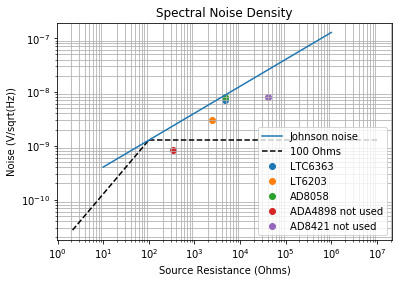

In [325]:
log_line = (10**(1*np.log10(line)) / 10e9)
#plt.loglog(line[1:], log_line[1:])
plt.loglog(line[1:], new_line[1:], '--k',)
plt.loglog(R, V_n, label="Johnson noise")
plt.hlines(ref_res_noise, xmin=100, xmax=10e6, linestyles="dashed", label="100 Ohms") # 100 Ohm source reference
plt.scatter(LTC6363_Rs, LTC6363_volt_noise,  label="LTC6363")
plt.scatter(LTC6203_Rs, LT6203_volt_noise,  label="LT6203")
plt.scatter(AD8058_Rs, AD8058_volt_noise,  label="AD8058")
plt.scatter(ADA4898_Rs, ADA4898_volt_noise,  label="ADA4898 not used")
plt.scatter(AD8421_Rs, AD8421_volt_noise,  label="AD8421 not used")
plt.xlabel("Source Resistance (Ohms)")
plt.ylabel("Noise (V/sqrt(Hz))")
plt.title("Spectral Noise Density")
plt.grid(True, which="minor")
plt.legend()
plt.show()